In [1]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import plotly.express as px

## Monthly Trends in ASDS data

In [2]:
# Load the data
purple_df = pd.read_csv('../data/Daily ASDS 2018-2023 for South San Francisco San Bruno.csv')
purple_df.head()

,Site_ID,Site_Name,Datetime,Date,JDay,Month,DOW,Day,Latitude,Longitude,Elevation,County,PM2.5_EPA,PM2.5_Uncorr,QC_Flags,QC_Descriptor,Temp,RH
0,20737,AZ South San Francisco,2023-04-04,2023-04-04,94.0,4.0,Tuesday,4,37.664036,-122.39622,20.0,San Mateo,NaN,NaN,8,Incomplete,59.012716,65.120833
1,20737,AZ South San Francisco,2023-04-05,2023-04-05,95.0,4.0,Wednesday,5,37.664036,-122.39622,20.0,San Mateo,-0.644752,1.566938,0,Valid,56.966379,83.832088
2,20737,AZ South San Francisco,2023-04-06,2023-04-06,96.0,4.0,Thursday,6,37.664036,-122.39622,20.0,San Mateo,-0.261639,2.842722,0,Valid,59.054837,87.091331
3,20737,AZ South San Francisco,2023-04-07,2023-04-07,97.0,4.0,Friday,7,37.664036,-122.39622,20.0,San Mateo,-2.158387,1.330026,0,Valid,59.647031,99.991667
4,20737,AZ South San Francisco,2023-04-08,2023-04-08,98.0,4.0,Saturday,8,37.664036,-122.39622,20.0,San Mateo,-0.918740,1.057701,0,Valid,61.743056,83.938889


In [3]:
# Load metadata
purple_metadata = pd.read_csv('../data/ASDS 2018-2023 for South San Francisco and San Bruno Metadata.csv')
purple_metadata.head()

,Site_ID,Date_Created,Site_Name,Model,Hardware,Firmware_Version,Firmware_Upgrade,Latitude,Longitude,Elevation,County,Geohash_4,Geohash_5,Geohash_6,Geohash_7,Imposter_Sensors,Indoor_Sensors,Problematic_Sensors,geometry
0,20737,12/5/18 12:24,AZ South San Francisco,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.664036,-122.39622,20,San Mateo,9q8y,9q8yq,9q8yqb,9q8yqb9,False,False,False,POINT (-122.39622 37.664036)
1,21427,12/11/18 12:53,Grundy Park,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.622585,-122.42097,86,San Mateo,9q8y,9q8yn,9q8yn0,9q8yn0z,False,False,False,POINT (-122.42097 37.622585)
2,38589,8/29/19 8:32,Sign Hill,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.665333,-122.41648,261,San Mateo,9q8y,9q8yq,9q8yq2,9q8yq2g,False,False,False,POINT (-122.41648 37.665333)
3,60171,7/23/20 14:31,South San Francisco Westborough Park,PA-II-SD,2.0+OPENLOG+NO-DISK+DS3231+BME280+PMSX003-B+PM...,7.02,NaN,37.643610,-122.45865,436,San Mateo,9q8y,9q8yj,9q8yjk,9q8yjku,False,False,False,POINT (-122.45865 37.64361)
4,65711,9/4/20 8:20,Commodore Dr,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.633860,-122.42311,76,San Mateo,9q8y,9q8yn,9q8yn5,9q8yn5n,False,False,False,POINT (-122.42311 37.63386)


In [4]:
# Change Month to `int
purple_df['Month'] = purple_df['Month'].astype(int)

# Convert Date to datetime and format it
purple_df["Date"] = pd.to_datetime(purple_df["Date"])
purple_df["Date"] = purple_df["Date"].dt.strftime("%Y-%m-%d")
purple_df = purple_df.sort_values(by='Date')

# Map integer months to their names and order them
month_order = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
purple_df['MonthName'] = purple_df['Month'].map(month_order)

# Extract year from date
purple_df['Year'] = purple_df['Date'].str[:4]
purple_df.head()

,Site_ID,Site_Name,Datetime,Date,JDay,Month,DOW,Day,Latitude,Longitude,Elevation,County,PM2.5_EPA,PM2.5_Uncorr,QC_Flags,QC_Descriptor,Temp,RH,MonthName,Year
21,21427,Grundy Park,2018-12-27,2018-12-27,361.0,12,Thursday,27,37.622585,-122.42097,86.0,San Mateo,2.999879,0.235523,0,Valid,63.420574,32.497038,December,2018
22,21427,Grundy Park,2018-12-28,2018-12-28,362.0,12,Friday,28,37.622585,-122.42097,86.0,San Mateo,3.857956,0.867872,0,Valid,60.251646,27.248107,December,2018
23,21427,Grundy Park,2018-12-29,2018-12-29,363.0,12,Saturday,29,37.622585,-122.42097,86.0,San Mateo,4.176301,3.955990,0,Valid,58.770833,42.218768,December,2018
24,21427,Grundy Park,2018-12-30,2018-12-30,364.0,12,Sunday,30,37.622585,-122.42097,86.0,San Mateo,5.093023,7.883132,0,Valid,60.155135,55.304714,December,2018
25,21427,Grundy Park,2018-12-31,2018-12-31,365.0,12,Monday,31,37.622585,-122.42097,86.0,San Mateo,3.513953,0.680238,0,Valid,59.689613,30.113612,December,2018


In [5]:
# Select entries from 2023
purple_2023 = purple_df[purple_df['Year'] == '2023']

# Order months correctly
purple_2023['MonthName'] = pd.Categorical(purple_2023['MonthName'], 
                                          categories=list(month_order.values()), 
                                          ordered=True)

purple_2023.head()

/var/folders/tc/ygtvb05s0279mq2rg4cgkqp00000gn/T/ipykernel_84342/3826603841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purple_2023['MonthName'] = pd.Categorical(purple_2023['MonthName'],


,Site_ID,Site_Name,Datetime,Date,JDay,Month,DOW,Day,Latitude,Longitude,Elevation,County,PM2.5_EPA,PM2.5_Uncorr,QC_Flags,QC_Descriptor,Temp,RH,MonthName,Year
22648,144654,Valleyview &amp; Appian Way,2023-01-01,2023-01-01,1.0,1,Sunday,1,37.640972,-122.44539,377.0,San Mateo,1.882632,3.630889,0,Valid,55.427778,66.923611,January,2023
6321,67263,Danger Stairs,2023-01-01,2023-01-01,1.0,1,Sunday,1,37.662823,-122.45957,168.0,San Mateo,3.906030,5.752110,0,Valid,57.002617,56.221709,January,2023
18380,109718,terra,2023-01-01,2023-01-01,1.0,1,Sunday,1,37.669968,-122.42153,277.0,San Mateo,3.171668,2.288042,0,Valid,64.911111,43.815278,January,2023
19529,111498,Crestmoor III,2023-01-01,2023-01-01,1.0,1,Sunday,1,37.616806,-122.43100,236.0,San Mateo,4.620015,7.296987,0,Valid,57.373036,57.260680,January,2023
15193,91617,Parkside Intermediate School,2023-01-01,2023-01-01,1.0,1,Sunday,1,37.621143,-122.42189,104.0,San Mateo,3.409919,4.826618,0,Valid,56.112500,56.394444,January,2023


In [6]:
# Group by MonthName and calculate the mean PM2.5
monthly_means = purple_2023.groupby('MonthName')['PM2.5_EPA'].mean().reset_index()
daily_means = purple_2023.groupby('Date')['PM2.5_EPA'].mean().reset_index()

/var/folders/tc/ygtvb05s0279mq2rg4cgkqp00000gn/T/ipykernel_84342/1587616656.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_means = purple_2023.groupby('MonthName')['PM2.5_EPA'].mean().reset_index()


In [7]:
# Create a bar plot highhlighting the average PM2.5 by month in 2023
fig = px.bar(monthly_means, x='MonthName', y='PM2.5_EPA',
             title='Average PM2.5 by Month',
             labels={'PM2.5_EPA': 'Average PM2.5 (EPA)', 'MonthName': 'Month'})

# Show the plot
fig.show()


In [8]:
# Create a line plot of PM2.5 by date and location
fig = px.line(
    daily_means,
    x='Date',
    y='PM2.5_EPA',
    title='Line Graph of PM2.5_EPA in 2023',
    labels={'PM2.5_EPA': 'PM2.5 (EPA)', 'Date': 'Month'},
    markers=True
)

# Show figure
fig.show()

In [9]:
# Plot line graph of PM2.5 grouped by location
fig = px.line(
    purple_2023,
    x='Date',
    y='PM2.5_EPA',
    color='Site_Name',
    title='Line Graph of PM2.5_EPA in 2023 by Location',
    labels={'PM2.5_EPA': 'PM2.5 (EPA)', 'Date': 'Month'}
)

# Generate the visibility array for each button
site_names = purple_2023['Site_Name'].unique()
buttons = [{'label': 'All', 'method': 'update', 'args': [{'visible': [True] * len(site_names)}]}]

# Add a button for each unique Site_ID
for i, site_name in enumerate(site_names):
    visible = [False] * len(site_names)
    visible[i] = True
    buttons.append({'label': str(site_name), 'method': 'update', 'args': [{'visible': visible}]})

# Update layout with buttons
fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True
    }]
)

# Show figure
fig.show()

## Hourly Trends in ASDS data

In [10]:
# Load the data
purple_hourly_df = pd.read_csv('../data/Hourly ASDS 2018-2023 for South San Francisco San Bruno.csv')
purple_hourly_df.head()

,Site_ID,Site_Name,Datetime,Date,Time,JDay,Month,DOW,Hour,Latitude,Longitude,Elevation,County,PM2.5_EPA,PM2.5_Uncorr,QC_Flags,QC_Descriptor,Temp,RH
0,20737,AZ South San Francisco,2023-04-04 08:00:00,2023-04-04,08:00:00,94,4,Tuesday,8,37.664036,-122.39622,20.0,San Mateo,1.992040,0.590333,0,Valid,60.000000,47.266667
1,20737,AZ South San Francisco,2023-04-04 09:00:00,2023-04-04,09:00:00,94,4,Tuesday,9,37.664036,-122.39622,20.0,San Mateo,2.167773,0.018667,0,Valid,61.133333,41.766667
2,20737,AZ South San Francisco,2023-04-04 10:00:00,2023-04-04,10:00:00,94,4,Tuesday,10,37.664036,-122.39622,20.0,San Mateo,2.616487,0.275167,0,Valid,64.300000,38.100000
3,20737,AZ South San Francisco,2023-04-04 11:00:00,2023-04-04,11:00:00,94,4,Tuesday,11,37.664036,-122.39622,20.0,San Mateo,3.033380,0.338167,0,Valid,69.633333,33.633333
4,20737,AZ South San Francisco,2023-04-04 12:00:00,2023-04-04,12:00:00,94,4,Tuesday,12,37.664036,-122.39622,20.0,San Mateo,3.316980,0.574833,0,Valid,69.766667,31.766667


In [11]:
# Interested in Sept 20, 2023...filter by that date
sept_20_df = purple_hourly_df[purple_hourly_df['Date'] == '2023-09-20']
sept_20_df.head()

,Site_ID,Site_Name,Datetime,Date,Time,JDay,Month,DOW,Hour,Latitude,Longitude,Elevation,County,PM2.5_EPA,PM2.5_Uncorr,QC_Flags,QC_Descriptor,Temp,RH
41648,21427,Grundy Park,2023-09-20 00:00:00,2023-09-20,00:00:00,263,9,Wednesday,0,37.622585,-122.42097,86.0,San Mateo,47.912007,91.351167,0,Valid,65.733333,62.100000
41649,21427,Grundy Park,2023-09-20 01:00:00,2023-09-20,01:00:00,263,9,Wednesday,1,37.622585,-122.42097,86.0,San Mateo,47.792233,91.192500,0,Valid,64.600000,62.533333
41650,21427,Grundy Park,2023-09-20 02:00:00,2023-09-20,02:00:00,263,9,Wednesday,2,37.622585,-122.42097,86.0,San Mateo,45.540260,86.955500,0,Valid,63.866667,63.100000
41651,21427,Grundy Park,2023-09-20 03:00:00,2023-09-20,03:00:00,263,9,Wednesday,3,37.622585,-122.42097,86.0,San Mateo,40.589727,77.402167,0,Valid,63.000000,62.900000
41652,21427,Grundy Park,2023-09-20 04:00:00,2023-09-20,04:00:00,263,9,Wednesday,4,37.622585,-122.42097,86.0,San Mateo,39.809593,75.940500,0,Valid,63.000000,63.133333


In [12]:
# Create a line plot of PM2.5 by hour
fig = px.line(
    sept_20_df,
    x='Hour',
    y='PM2.5_EPA',
    color='Site_Name',
    title='Line Graph of PM2.5_EPA on September 20, 2023',
    labels={'PM2.5_EPA': 'PM2.5 (EPA)', 'Hour': 'Hour'}
)

# Generate the visibility array for each button
site_names = sept_20_df['Site_Name'].unique()
buttons = [{'label': 'All', 'method': 'update', 'args': [{'visible': [True] * len(site_names)}]}]

# Add a button for each unique Site_ID
for i, site_name in enumerate(site_names):
    visible = [False] * len(site_names)
    visible[i] = True
    buttons.append({'label': str(site_name), 'method': 'update', 'args': [{'visible': visible}]})

# Update layout with buttons
fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True
    }]
)

# Show figure
fig.show()

## Location of PurpleAir Monitors

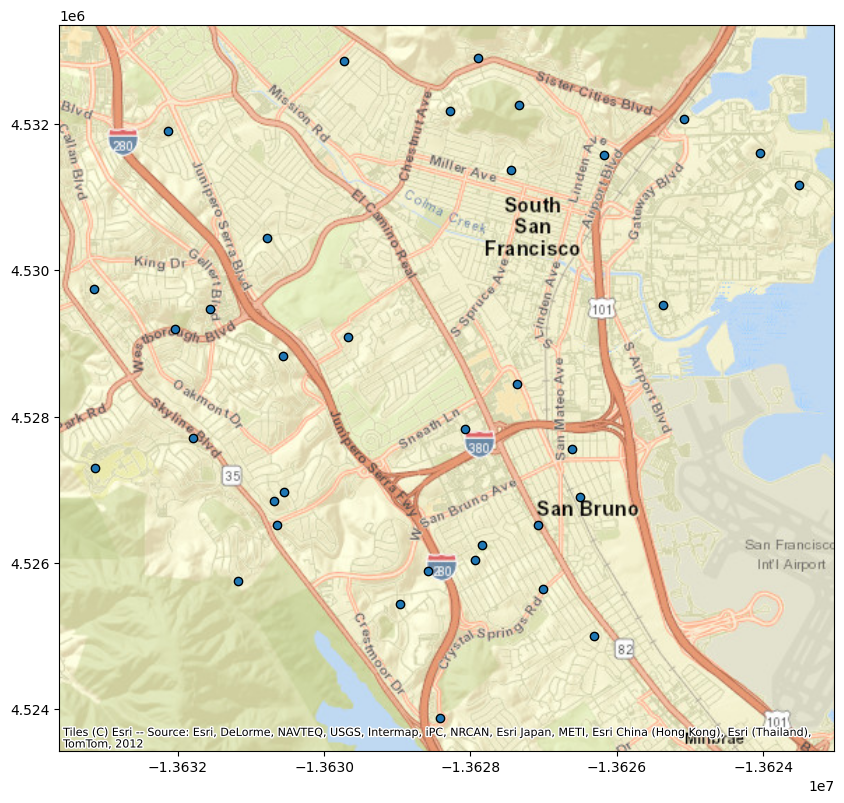

In [12]:
# Convert the metadata to a GeoDataFrame
purple_gdf = gpd.GeoDataFrame(purple_metadata,
                              geometry=gpd.points_from_xy(purple_metadata["Longitude"], purple_metadata["Latitude"],
                                                          crs='EPSG:4326'))

# Plot the locations of the monitoring sites
ax = purple_gdf.to_crs('EPSG:3857').plot(figsize=(10, 10), edgecolor='k')
cx.add_basemap(ax, source=cx.providers.Esri.WorldStreetMap)